In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Replace 'data.csv' with your CSV file path
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Crimes_-_2001_to_Present.csv'

chunk_size = 10000  # Adjust the chunk size according to your system's memory capacity

# Create an empty list to hold the chunks
chunks = []

# Read the CSV file in chunks and process each chunk
for chunk in pd.read_csv(csv_file_path, nrows=1000):
    chunks.append(chunk)

# Concatenate all the chunks into one DataFrame
data = pd.concat(chunks, ignore_index=True)

# Now you have the complete data in 'data' DataFrame


In [5]:
import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
import pickle   ## Dumping Model
%matplotlib inline

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

## Setting Seaborn
sns.set(style='white', context='paper', palette='cividis')

In [3]:
# data = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [7]:
# Shape
print(f'Dataset (row,col): {data.shape}')

Dataset (row,col): (7784664, 22)


In [8]:
# Sample
data.sample(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3983337,5523596,HN332437,05/09/2007 04:14:00 PM,009XX E 84TH PL,0560,ASSAULT,SIMPLE,APARTMENT,False,False,...,8.0,44.0,08A,1184199.0,1849164.0,2007,02/10/2018 03:50:01 PM,41.741278,-87.600683,"(41.741278112, -87.600682867)"
6390334,9410927,HW554619,12/01/2013 05:10:00 PM,059XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,20.0,40.0,08B,1178172.0,1865727.0,2013,02/10/2018 03:50:01 PM,41.786867,-87.622264,"(41.786867488, -87.622263593)"
5216243,7504054,HS307029,05/14/2010 10:45:00 AM,070XX S HERMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,...,17.0,67.0,08B,1165898.0,1857987.0,2010,02/10/2018 03:50:01 PM,41.765898,-87.667486,"(41.765897663, -87.667486379)"
978532,1366322,G056961,01/27/2001 11:03:00 PM,015XX N KEATING AV,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,NaN,NaN,18,1144478.0,1910058.0,2001,08/17/2015 03:03:40 PM,41.909216,-87.744691,"(41.90921604, -87.744691063)"
696592,11277826,JB213434,04/06/2018 09:00:00 AM,084XX S VINCENNES AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,COMMERCIAL / BUSINESS OFFICE,False,False,...,21.0,71.0,14,1173642.0,1848646.0,2018,05/04/2018 03:51:04 PM,41.740097,-87.639378,"(41.740096782, -87.639378181)"
730494,11179393,JA551589,12/16/2017 01:05:00 PM,020XX W CHICAGO AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,1.0,24.0,06,1162692.0,1905336.0,2017,05/04/2018 03:51:04 PM,41.895896,-87.677913,"(41.895896023, -87.677913394)"
7618266,12790783,JF352743,08/11/2022 12:15:00 PM,027XX E 96TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,10.0,51.0,14,1196051.0,1841829.0,2022,01/03/2023 03:46:28 PM,41.720865,-87.557501,"(41.720865149, -87.557500897)"
5186081,7314771,HS119148,01/13/2010 09:45:00 PM,074XX N ROGERS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,CTA GARAGE / OTHER PROPERTY,False,False,...,49.0,1.0,15,1163951.0,1949684.0,2010,02/10/2018 03:50:01 PM,42.017563,-87.672032,"(42.017562503, -87.672032437)"
3509366,4800945,HM415061,06/15/2006 07:25:00 AM,041XX N WOLCOTT AVE,0330,ROBBERY,AGGRAVATED,SIDEWALK,False,False,...,47.0,5.0,03,1162938.0,1927330.0,2006,02/10/2018 03:50:01 PM,41.956244,-87.676391,"(41.956243789, -87.676391004)"
3307517,4407727,HL700833,07/20/2005 12:01:00 AM,046XX N ELSTON AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,OTHER,False,False,...,39.0,14.0,11,1146411.0,1930762.0,2005,02/28/2018 03:56:25 PM,41.965993,-87.737061,"(41.965993048, -87.737061003)"


In [9]:
# check column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [10]:
# Missing values
print(f'Missing values in Dataset:\n{data.isnull().sum()}')
df=data.isnull().sum()
df.sum()

Missing values in Dataset:
ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64


1672996

In [11]:
# Descirbe Data
data.describe(include=['number', 'object'])

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7.784664e+06,7.784617e+06,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HJ590004,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,NaN,NaN,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,NaN,NaN,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185918e+03,1.129466e+01,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.031335e+02,6.952422e+00,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


In [12]:
# Duplicates
print(f'Duplicates in Dataset: {data.duplicated().sum()}')

Duplicates in Dataset: 0


Text(0.5, 1.0, 'Correlations in  Dataset\n')

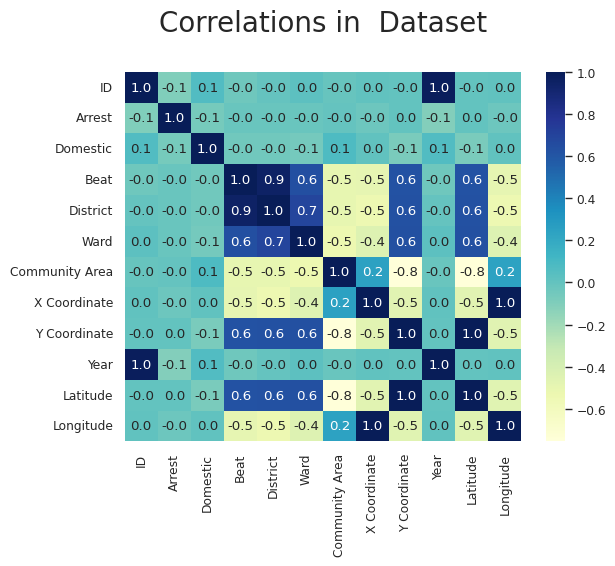

In [13]:
# Correlation in dataset
ax = sns.heatmap(data.corr(), cmap='YlGnBu', annot=True ,fmt=".1f")
ax.set_title('Correlations in  Dataset\n', fontsize=20)



```
About Data
This Dataset consist 7784664 rows and 22 columns, containing 1672996 missing values and 0 duplicates.
Description:
Dataset contains information about **Crime in Chicago**

Columns:
** ID **:                    ID
** Case Number **:           Case Number Integer
** Date **:                  date
** Block **:                 ??
** IUCR **:                  ?
** Primary Type **:          Crime type
** Description **:           Crime Description
** Location Description **:  Location Description
** Beat **:                  ?
** District **:              ?
** Ward **:                  ?
** Community Area **:        ?
** FBI Code **:              FBI Code
** X Coordinate	**:          X Coordinate
** Y Coordinate **:          Y Coordinate
** Year **:                  Year
** Updated On **:            Crime time
** Latitude **:              Latitude
** Longitude	**:          Longitude
** Location **:              Crime Location




```



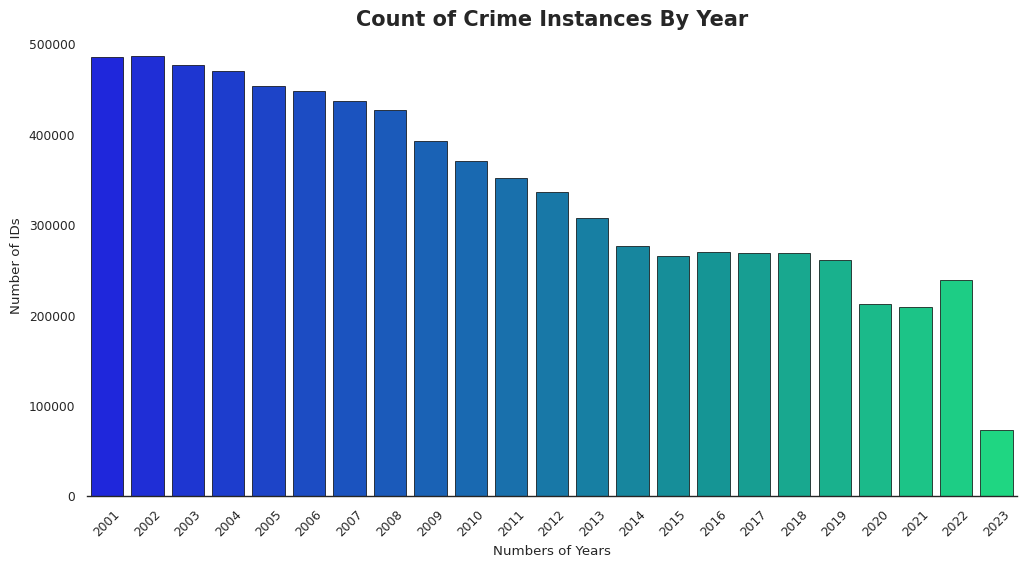

In [14]:
dfgroup = data.copy()
group = dfgroup.groupby("Year").count()

plt.figure(figsize=(12, 6))
plot = sns.barplot(data=group, x=group.index, y="ID", palette="winter", **{"linewidth":0.5, "edgecolor":"black"})
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plot.set_ylabel('Number of IDs')
plot.set_xlabel('Numbers of Years')
plot.set_title('Count of Crime Instances By Year', size=15, weight="bold")
sns.despine(left=True)
plot.tick_params(bottom=False, left=False)

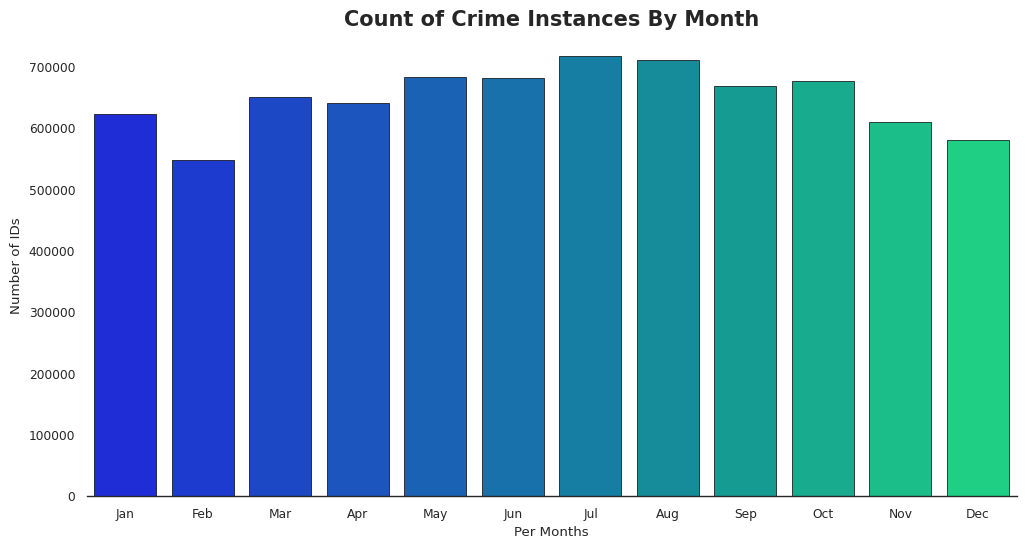

In [15]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
data['Month'] = data['Date'].dt.month

plt.figure(figsize=(12, 6))

dfgroup = data.copy()
group = dfgroup.groupby("Month").count()



xlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plot = sns.barplot(data=group, x=group.index, y="ID", palette="winter", **{"linewidth":0.5, "edgecolor":"black"})
plot.set_xticklabels(xlabels)
plot.set_ylabel('Number of IDs')
plot.set_xlabel('Per Months')
plot.set_title('Count of Crime Instances By Month', size=15, weight="bold")
sns.despine(left=True)
plot.tick_params(bottom=False, left=False)

Text(0.5, 1.0, 'Box plot of Crime Instances By Month for each year')

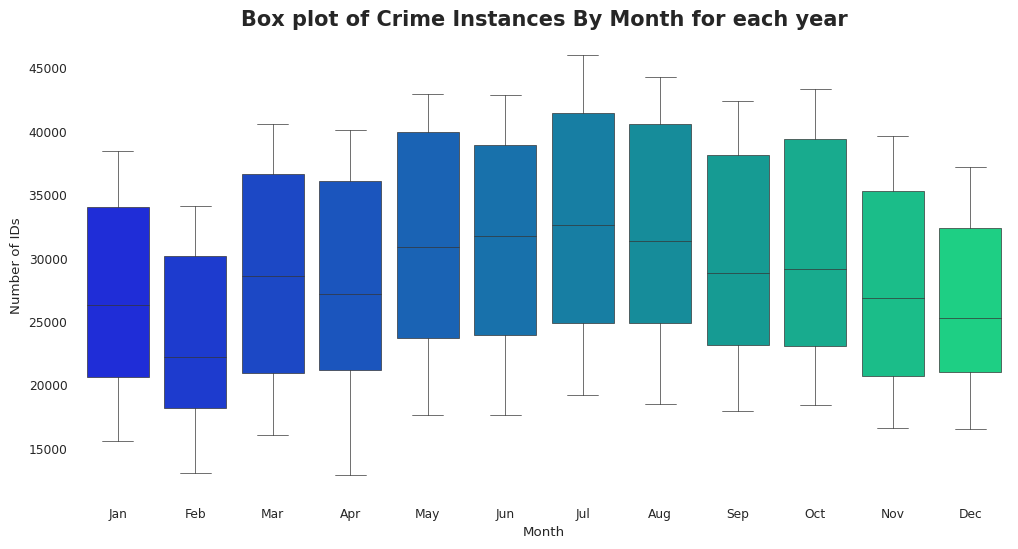

In [16]:
dfgroup = data.copy()
group = dfgroup.groupby(["Year","Month"]).count()

plt.figure(figsize=(12, 6))

group = group.reset_index()
plot = sns.boxplot(data=group, x="Month", y="ID", palette="winter", linewidth=0.5)
plot.set_xticklabels(xlabels)
plot.set_ylabel('Number of IDs')
sns.despine(left=True, bottom=True)
plot.tick_params(bottom=False, left=False)
plot.set_title('Box plot of Crime Instances By Month for each year', size=15, weight="bold")

In [17]:
typesofcrimes = data['Description'].unique().tolist()
typesofcrimes

['DOMESTIC BATTERY SIMPLE',
 'POCKET-PICKING',
 'OVER $500',
 'POSS: HEROIN(BRN/TAN)',
 'SIMPLE',
 'FORCIBLE ENTRY',
 'UNLAWFUL ENTRY',
 'RETAIL THEFT',
 'STRONGARM - NO WEAPON',
 'FINANCIAL IDENTITY THEFT OVER $ 300',
 '$500 AND UNDER',
 'TELEPHONE THREAT',
 'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON',
 'TO VEHICLE',
 'TO PROPERTY',
 'ARMED: HANDGUN',
 'FROM BUILDING',
 'AGGRAVATED: OTHER DANG WEAPON',
 'HARASSMENT BY TELEPHONE',
 'OTHER VEHICLE OFFENSE',
 'PAROLE VIOLATION',
 'POSS: CANNABIS 30GMS OR LESS',
 'UNLAWFUL USE OTHER DANG WEAPON',
 'GUN OFFENDER: ANNUAL REGISTRATION',
 'POSS FIREARM/AMMO:NO FOID CARD',
 'COUNTERFEIT CHECK',
 'MANU/DELIVER: HEROIN (WHITE)',
 'UNLAWFUL POSS OTHER FIREARM',
 'UNLAWFUL USE HANDGUN',
 'TO LAND',
 'AUTOMOBILE',
 'HARASSMENT BY ELECTRONIC MEANS',
 'FRAUD OR CONFIDENCE GAME',
 'POSS: CRACK',
 'AGGRAVATED:KNIFE/CUTTING INSTR',
 'ATTEMPT THEFT',
 'SOLICIT NARCOTICS ON PUBLICWAY',
 'POSS: HEROIN(WHITE)',
 'PUBLIC INDECENCY',
 'MANU/DELIVER:CRACK

In [18]:
len(typesofcrimes)

544

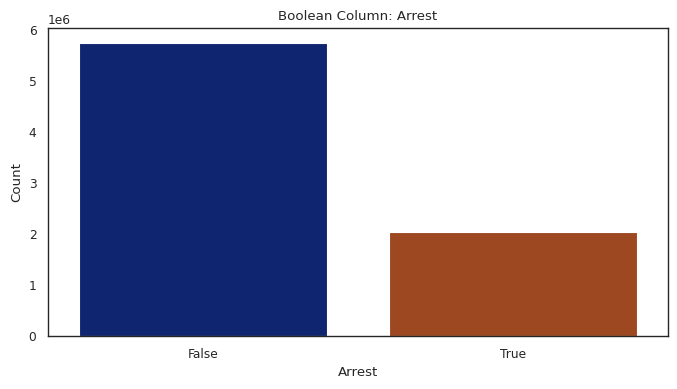

In [19]:
boolean_column = 'Arrest'  # Replace with your actual column name

# Step 3: Create a count plot for the boolean column
plt.figure(figsize=(8, 4)) # Set the size of the plot if needed
sns.countplot(x=boolean_column, data=data, palette='dark')
plt.title(f'Boolean Column: {boolean_column}')
plt.xlabel(boolean_column)
plt.ylabel('Count')
plt.show()

In [20]:
import plotly.express as px
plt.figure(figsize=(10,8))

crime_counts = data['Primary Type'].value_counts()


# Create a bar chart
fig = px.bar(crime_counts, x=crime_counts.index, y=crime_counts.values,
             labels={'x': 'Crime Type', 'y': 'Crime Count'}, title='Crime Counts by Primary Type')
fig.update_layout(width=1000, height=1000)

# Show the bar chart
fig.show()

<Figure size 1000x800 with 0 Axes>

In [21]:
arrest_counts = data['Arrest'].value_counts()

# Create a pie chart
fig = px.pie(values=arrest_counts.values, names=arrest_counts.index,
             title='Arrests vs. Non-Arrests', hole=0.1)

fig.update_layout(width=800, height=600)

# Show the pie chart
fig.show()

In [23]:
!pip install plotly plotly-express

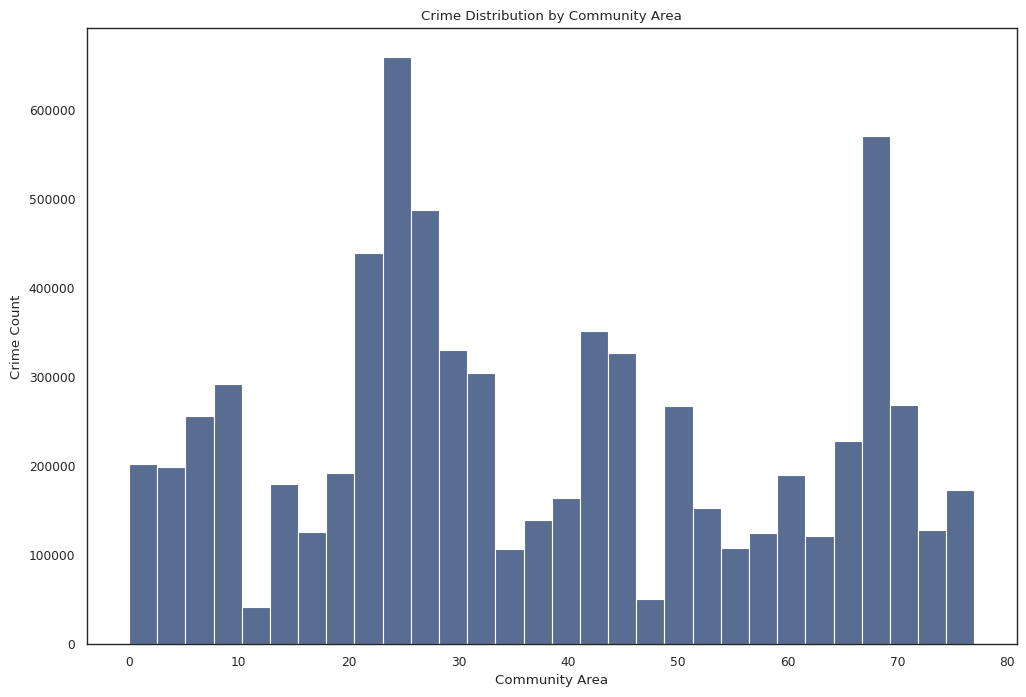

In [24]:
plt.figure(figsize=(12, 8))  # Set the figure size

sns.histplot(data=data, x='Community Area', bins=30, kde=False)

plt.title('Crime Distribution by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')

plt.show()

In [25]:
# Create a pivot table to calculate crime counts by primary type and arrest status
crime_counts_pivot = pd.pivot_table(data, index='Primary Type', columns='Arrest', values='ID', aggfunc='count', fill_value=0)

# Create a stacked bar chart
fig = px.bar(crime_counts_pivot, x=crime_counts_pivot.index, y=[True, False],
             title='Crime Counts by Primary Type and Arrest Status',
             labels={'x': 'Primary Type', 'y': 'Crime Count'},
             color_discrete_map={True: 'darkblue', False: 'lightblue'})

fig.update_layout(width=1200, height=600)

# Show the stacked bar chart
fig.show()

In [5]:
# # Create a scatter plot
# fig = px.scatter(data, x='Longitude', y='Latitude', color='Primary Type',
#                  title='Crime Locations by Latitude and Longitude',
#                  labels={'Latitude': 'Latitude', 'Longitude': 'Longitude'})

# fig.update_layout(width=800, height=600)

# # Show the scatter plot
# fig.show()
import pandas as pd

# Replace 'data.csv' with your CSV file path
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Crimes_-_2001_to_Present.csv'

# chunk_size = 10000  # Adjust the chunk size according to your system's memory capacity

# Create an empty list to hold the chunks
# chunks = []

# Read the CSV file in chunks and process each chunk
data= pd.read_csv(csv_file_path, nrows=1000)


# Concatenate all the chunks into one DataFrame
# data = pd.concat(chunks, ignore_index=True)

# Now you have the complete data in 'data' DataFrame

In [7]:
import folium
from folium import plugins

data = data.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered at the mean latitude and longitude
map_location = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Add markers for each crime location with different colors based on 'Primary Type'
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Primary Type: {row['Primary Type']}",
                  icon=folium.Icon(color='blue')).add_to(map_location)

# Show the map
map_location

In [4]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
!pip install folium